<a href="https://colab.research.google.com/github/dhayapulepraneeth/py/blob/master/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [214]:
!pip install geopandas
!pip install pysal
!pip install spreg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [215]:
df = pd.read_csv('/content/U.S._Chronic_Disease_Indicators__CDI_ (5).csv')


<ipython-input-215-3fd7d0ccc969>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/U.S._Chronic_Disease_Indicators__CDI_ (5).csv')


In [216]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,2020,2020,WY,Wyoming,BRFSS,Diabetes,Dilated eye examination among adults aged >= 1...,NaN,%,Age-adjusted Prevalence,...,56,DIA,DIA7_0,AGEADJPREV,RACE,WHT,NaN,NaN,NaN,NaN
1185672,2020,2020,WY,Wyoming,BRFSS,Older Adults,Proportion of older adults aged >= 65 years wh...,NaN,%,Crude Prevalence,...,56,OLD,OLD3_1,CRDPREV,RACE,WHT,NaN,NaN,NaN,NaN
1185673,2017,2017,IA,Iowa,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,NaN,%,Age-adjusted Prevalence,...,19,ART,ART2_1,AGEADJPREV,RACE,HIS,NaN,NaN,NaN,NaN
1185674,2020,2020,WY,Wyoming,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,NaN,%,Crude Prevalence,...,56,DIA,DIA2_2,CRDPREV,RACE,HIS,NaN,NaN,NaN,NaN


In [217]:
#droping the columns 
df = df.drop(['DataSource','LowConfidenceLimit','HighConfidenceLimit','LocationID',
              'DataValueFootnoteSymbol','DatavalueFootnote','Response','ResponseID', 'StratificationCategory2',
              'StratificationCategory3','Stratification2','Stratification3', 'StratificationCategoryID2', 
              'StratificationCategoryID3','StratificationID2','StratificationID3'], axis = 1)

In [218]:
df=df.dropna()

In [219]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1,GeoLocation,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
14,2020,2020,IL,Illinois,Asthma,Asthma mortality rate,Number,Number,89,89.0,Gender,Male,POINT (-88.99771017799969 40.48501028300046),AST,AST4_1,NMBR,GENDER,GENM
17,2018,2018,KS,Kansas,Asthma,Asthma mortality rate,Number,Number,29,29.0,Overall,Overall,POINT (-98.20078122699965 38.34774030000045),AST,AST4_1,NMBR,OVERALL,OVR
23,2019,2019,MS,Mississippi,Asthma,Asthma mortality rate,Number,Number,58,58.0,Overall,Overall,POINT (-89.53803082499968 32.745510099000455),AST,AST4_1,NMBR,OVERALL,OVR
25,2020,2020,NM,New Mexico,Asthma,Asthma mortality rate,Number,Number,26,26.0,Gender,Female,POINT (-106.24058098499967 34.52088095200048),AST,AST4_1,NMBR,GENDER,GENF
157,2020,2020,LA,Louisiana,Diabetes,Mortality with diabetic ketoacidosis reported ...,Number,Number,55,55.0,Gender,Male,POINT (-92.44568007099969 31.31266064400046),DIA,DIA1_2,NMBR,GENDER,GENM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185666,2017,2017,VT,Vermont,Arthritis,Activity limitation due to arthritis among adu...,%,Crude Prevalence,53.8,53.8,Race/Ethnicity,"Other, non-Hispanic",POINT (-72.51764079099962 43.62538123900049),ART,ART2_1,CRDPREV,RACE,OTH
1185668,2019,2019,ME,Maine,Arthritis,Activity limitation due to arthritis among adu...,%,Crude Prevalence,73.7,73.7,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-68.98503133599962 45.254228894000505),ART,ART2_1,CRDPREV,RACE,MRC
1185670,2019,2019,OK,Oklahoma,Arthritis,Activity limitation due to arthritis among adu...,%,Crude Prevalence,57.6,57.6,Race/Ethnicity,"Other, non-Hispanic",POINT (-97.52107021399968 35.47203135600046),ART,ART2_1,CRDPREV,RACE,OTH
1185672,2020,2020,WY,Wyoming,Older Adults,Proportion of older adults aged >= 65 years wh...,%,Crude Prevalence,41.5,41.5,Race/Ethnicity,"White, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),OLD,OLD3_1,CRDPREV,RACE,WHT


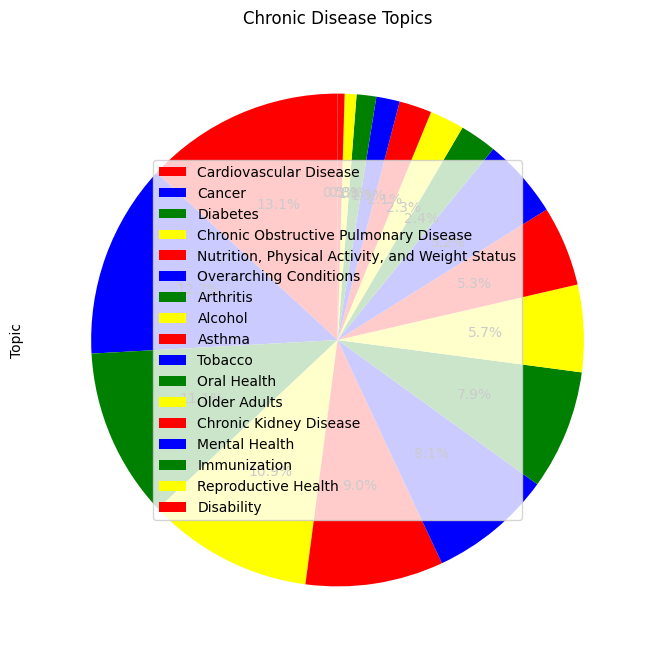

In [220]:
df['Topic'].value_counts().plot(kind='pie', colors=['red', 'blue', 'green', 'yellow'], labels=None, autopct='%1.1f%%', startangle=90, figsize=(8,8))
plt.title('Chronic Disease Topics')
plt.legend(labels=df['Topic'].value_counts().index, loc='best')
plt.show()

In [221]:
#visuvalizing the distribution of diseases in the dataset
df_topic = df.groupby('Topic')
df_topic_count = df_topic.count()

In [222]:
#we can see from above plot Crdiovascular counts are more,lets explore more about cardiovascular disease
df_cvd=df[df['Topic']=='Cardiovascular Disease']
df_cvd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90757 entries, 256210 to 1185449
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  90757 non-null  int64  
 1   YearEnd                    90757 non-null  int64  
 2   LocationAbbr               90757 non-null  object 
 3   LocationDesc               90757 non-null  object 
 4   Topic                      90757 non-null  object 
 5   Question                   90757 non-null  object 
 6   DataValueUnit              90757 non-null  object 
 7   DataValueType              90757 non-null  object 
 8   DataValue                  90757 non-null  object 
 9   DataValueAlt               90757 non-null  float64
 10  StratificationCategory1    90757 non-null  object 
 11  Stratification1            90757 non-null  object 
 12  GeoLocation                90757 non-null  object 
 13  TopicID                    90757 non-nu

In [223]:
df_cvd['Question'].value_counts()

Mortality from total cardiovascular diseases                                                                                   8741
Mortality from diseases of the heart                                                                                           8502
Mortality from coronary heart disease                                                                                          8029
Mortality from heart failure                                                                                                   7596
Mortality from cerebrovascular disease (stroke)                                                                                7435
Hospitalization for heart failure among Medicare-eligible persons aged >= 65 years                                             7314
Influenza vaccination among noninstitutionalized adults aged >= 65 years with a history of coronary heart disease or stroke    5016
Influenza vaccination among noninstitutionalized adults aged 18-64 years wit

In [224]:
# subset the data according to our analysis
Mortality_from_heart_failure= df_cvd[(df_cvd['Question']=='Mortality from heart failure') & (df_cvd['DataValueType']=='Crude Rate')]
Mortality_from_total_cardiovascular_diseases=df_cvd[(df_cvd['Question']=='Mortality from total cardiovascular diseases')& (df_cvd['DataValueType']=='Crude Rate')]
Mortality_from_diseases_of_the_heart=df_cvd[(df_cvd['Question']=='Mortality from diseases of the heart')& (df_cvd['DataValueType']=='Crude Rate')]
Mortality_from_coronar_heart_disease =df_cvd[(df_cvd['Question']=='Mortality from coronary heart disease')& (df_cvd['DataValueType']=='Crude Rate')]
Mortality_from_cerebrovascular_disease=df_cvd[(df_cvd['Question']=='Mortality from cerebrovascular disease (stroke)')& (df_cvd['DataValueType']=='Crude Rate')]
Cholesterol=df_cvd[(df_cvd['Question']=='High cholesterol prevalence among adults aged >= 18 years') & (df_cvd['DataValueType']=='Crude Prevalence')]


In [225]:
df=df[(df['Question']=='Mortality from total cardiovascular diseases')& (df['DataValueType']=='Crude Rate')]

In [226]:
df=df[(df['Question']=='Mortality from total cardiovascular diseases')& (df['DataValueType']=='Crude Rate')]

In [227]:
Mortality_from_total_cardiovascular_diseases['DataValue'] = Mortality_from_total_cardiovascular_diseases['DataValue'].astype(float)


<ipython-input-227-f4188dce59bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mortality_from_total_cardiovascular_diseases['DataValue'] = Mortality_from_total_cardiovascular_diseases['DataValue'].astype(float)


In [228]:
cvd_yearly_mean = Mortality_from_total_cardiovascular_diseases.groupby('YearStart')['DataValue'].mean().reset_index()

cvd_yearly_mean


,YearStart,DataValue
0,2010,202.528814
1,2011,199.057735
2,2012,201.140782
3,2013,203.366111
4,2014,204.395014
5,2015,209.375824
6,2016,209.804396
7,2017,211.790566
8,2018,215.444022
9,2019,217.271545


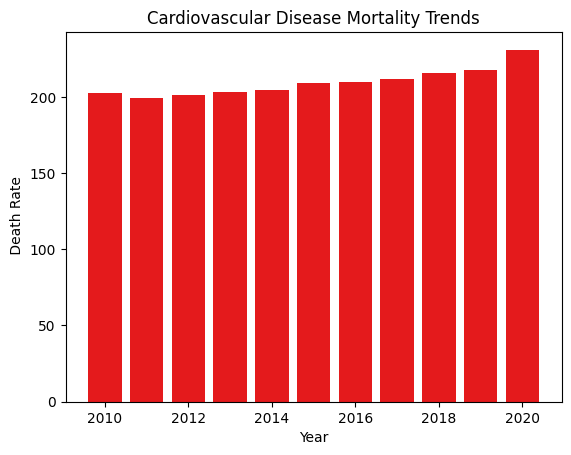

In [229]:
plt.bar(cvd_yearly_mean['YearStart'], cvd_yearly_mean['DataValue'])
plt.xlabel('Year')
plt.ylabel(' Death Rate')
plt.title('Cardiovascular Disease Mortality Trends')
plt.show()


In [230]:
race_df = Mortality_from_total_cardiovascular_diseases[Mortality_from_total_cardiovascular_diseases['StratificationCategory1'] == 'Race/Ethnicity']



In [231]:
race_mean = race_df.groupby('Stratification1')['DataValue'].mean().reset_index()


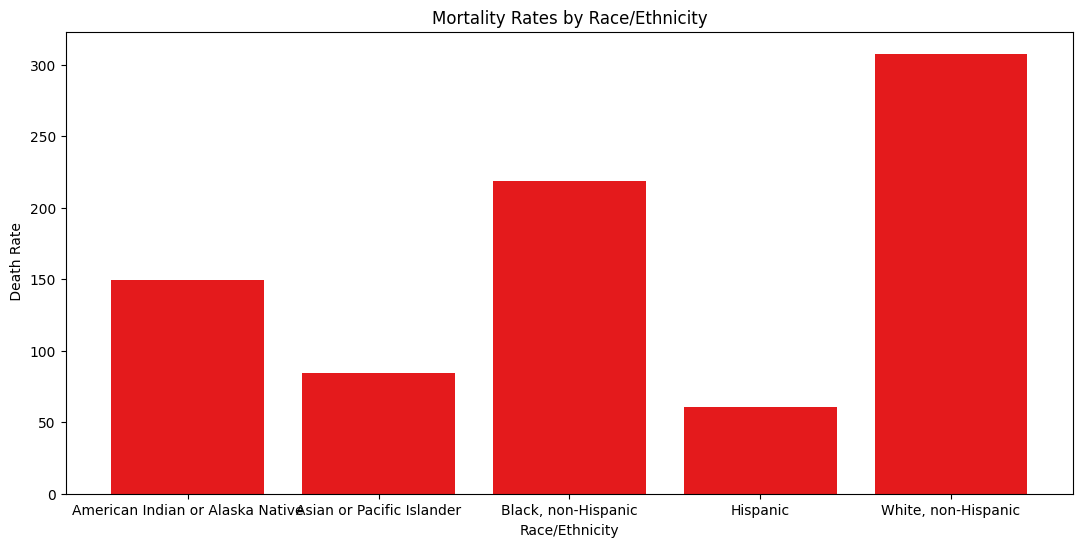

In [232]:
fig = plt.figure(figsize=(13, 6))

plt.bar(race_mean['Stratification1'], race_mean['DataValue'])
plt.xlabel('Race/Ethnicity')
plt.ylabel(' Death Rate')
plt.title('Mortality Rates by Race/Ethnicity')
plt.show()


In [233]:
gender_df = Mortality_from_total_cardiovascular_diseases[Mortality_from_total_cardiovascular_diseases['StratificationCategory1'] == 'Gender']


In [234]:
gender_yearly_mean = gender_df.groupby(['YearStart', 'Stratification1'])['DataValue'].mean().reset_index()


In [235]:
gender_yearly_pivot = gender_yearly_mean.pivot(index='YearStart', columns='Stratification1', values='DataValue')


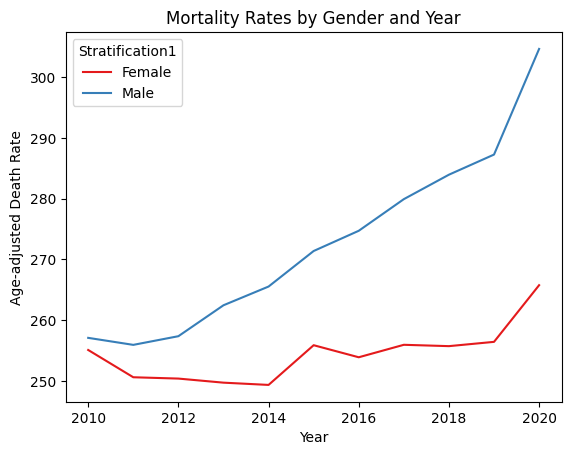

In [236]:
gender_yearly_pivot.plot()
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Age-adjusted Death Rate')
plt.title('Mortality Rates by Gender and Year')

# Show the plot
plt.show()


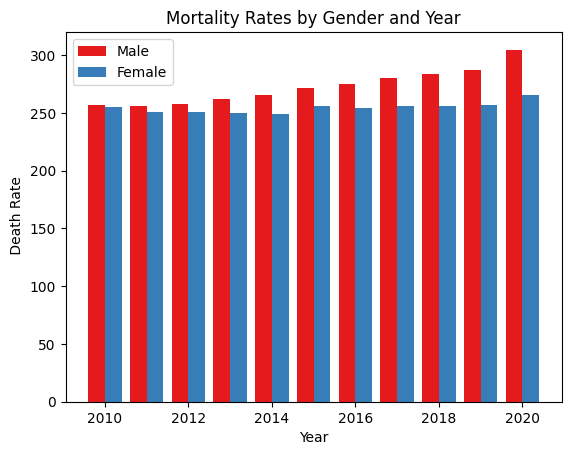

In [237]:
fig, ax = plt.subplots()

# Group the data by gender
male_data = gender_yearly_mean[gender_yearly_mean['Stratification1'] == 'Male']
female_data = gender_yearly_mean[gender_yearly_mean['Stratification1'] == 'Female']

# Plot the data for males and females separately
ax.bar(male_data['YearStart'], male_data['DataValue'], width=-0.4, align='edge', label='Male')
ax.bar(female_data['YearStart'], female_data['DataValue'], width=0.4, align='edge', label='Female')

# Add labels and title
plt.xlabel('Year')
plt.ylabel(' Death Rate')
plt.title('Mortality Rates by Gender and Year')

# Add a legend
ax.legend()

# Show the plot
plt.show()


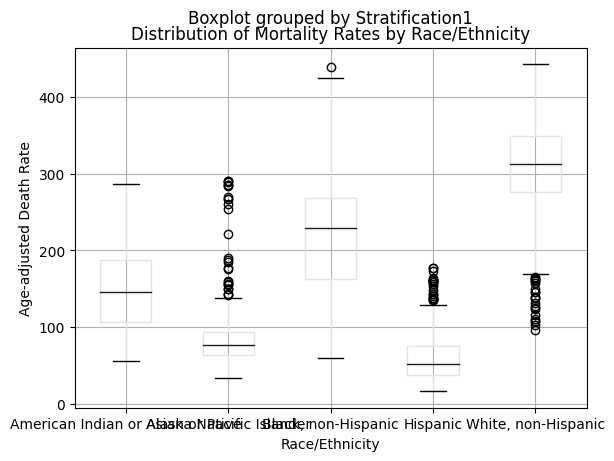

In [238]:

race_df.boxplot(column='DataValue', by='Stratification1')
# Add labels and title
plt.xlabel('Race/Ethnicity')
plt.ylabel('Age-adjusted Death Rate')
plt.title('Distribution of Mortality Rates by Race/Ethnicity')

# Show the plot
plt.show()

In [239]:
# Heart failure and cholestrol rates for the year 2017 and 2019
heart_failure_2017= Mortality_from_heart_failure[Mortality_from_heart_failure['YearStart']==2017]
heart_failure_2019= Mortality_from_heart_failure[Mortality_from_heart_failure['YearStart']==2019]
Cholesterol_2019=Cholesterol[Cholesterol['YearStart']==2019]
Cholesterol_2017=Cholesterol[Cholesterol['YearStart']==2017]

In [240]:
#converting the Datavalue into numerics
heart_failure_2017['DataValue']=pd.to_numeric(heart_failure_2017['DataValue'])
heart_failure_2019['DataValue']=pd.to_numeric(heart_failure_2019['DataValue'])
Cholesterol_2019['DataValue']=pd.to_numeric(Cholesterol_2019['DataValue'])
Cholesterol_2017['DataValue']=pd.to_numeric(Cholesterol_2017['DataValue'])

<ipython-input-240-0565e098002f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_failure_2017['DataValue']=pd.to_numeric(heart_failure_2017['DataValue'])
<ipython-input-240-0565e098002f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_failure_2019['DataValue']=pd.to_numeric(heart_failure_2019['DataValue'])
<ipython-input-240-0565e098002f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [241]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.figure_factory as ff 
import plotly

/usr/local/lib/python3.9/dist-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-241-68c006eab25a>:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  im

In [242]:
# choropleth mapping for heart failure crude rate in the year 2017
fig = px.choropleth(heart_failure_2017, locations="LocationAbbr",locationmode='USA-states',color= 'DataValue',color_continuous_scale='Matter',  scope='usa',hover_name="LocationDesc",labels = {'DataValue':'Morality '},title="Mortality crude rate from heart failure 2017")
fig.show()

In [243]:
# choropleth mapping for heart failure crude rate in the year 2019
fig = px.choropleth(heart_failure_2019, locations="LocationAbbr",locationmode='USA-states', color= 'DataValue',color_continuous_scale='Matter',  scope='usa',hover_name="LocationDesc", labels = {'DataValue':'Morality'},title="Mortality crude rate from heart failure 2019")
fig.show()

In [244]:
# choropleth mapping for cholestrol crude rate in the year 2017

fig = px.choropleth(Cholesterol_2017,locations="LocationAbbr",locationmode='USA-states',color= 'DataValue',color_continuous_scale='Matter',  scope='usa',hover_name="LocationDesc",labels = {'DataValue':'cholestrol percentages'},title="High cholestrol crude rate percentages who are suffering with CVD_2017")
fig.show()


In [245]:
# choropleth mapping for cholestrol crude rate in the year 2019
fig = px.choropleth(Cholesterol_2019,locations="LocationAbbr",locationmode='USA-states',color= 'DataValue',color_continuous_scale='Matter',  scope='usa',hover_name="LocationDesc",labels = {'DataValue':'cholestrol percentages'},title="High cholestrol crude rate percentages who are suffering with CVD_2019")
fig.show()

In [253]:
# subset of physical inactivity crude prevalences for the years 2017 and 2019
no_time= df[(df['QuestionID'] == 'NPAW10_0') & (df['DataValueType'] == 'Crude Prevalence')]
no_time= no_time[(no_time['YearStart']==2017)|(no_time['YearStart']==2019)]


In [254]:
#comparing the cholestrol crude prevalence and physical inactivity prevalences for the year 2017 and 2019
comparing = df[(df['QuestionID'] == 'NPAW10_0') & (df['DataValueType'] == 'Crude Prevalence') | (df['QuestionID']=='CVD5_0') & (df['DataValueType'] == 'Crude Prevalence')]
comparing= comparing[(comparing['YearStart']==2017)|(comparing['YearStart']==2019)]


In [255]:
# comparing for the states 
values = ['CA', 'NC', 'TX', 'MT','WA']
comparing = comparing.loc[(comparing['LocationAbbr'].isin(values))].sort_values(by=['LocationDesc', 'YearStart'],ascending=True)

In [256]:
 #plotting the comparisions for the year 2017 and 2019
fig = px.histogram(comparing, x="LocationDesc", y="DataValue",animation_frame="YearStart", color="Question",barmode="group", hover_name="Topic")
fig.show()

In [257]:
df_d = pd.read_csv('/content/mydataset.csv')


In [258]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from libpysal.weights import DistanceBand
from spreg import GM_Error_Het
import statsmodels.api as sm

In [259]:
# OLS
X = sm.add_constant(df_d[['BMI', 'Age', 'BloodPressure', 'Lipoprotiens']])
y = df_d['Glucose_level']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Glucose_level   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     3730.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:47:31   Log-Likelihood:                -21549.
No. Observations:                7106   AIC:                         4.311e+04
Df Residuals:                    7101   BIC:                         4.314e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.3175      0.849     10.970

In [300]:
# create point geometries from (x,y) coordinates
geometry = [Point(xy) for xy in zip(df_d.BMI, df_d.Age)]
df_d['geometry'] = geometry



In [263]:
# create GeoDataFrame
df_d = gpd.GeoDataFrame(df_d)



In [266]:
# create spatial weights matrix
distance = 10
w = DistanceBand.from_dataframe(df_d, distance, binary=False)




/usr/local/lib/python3.9/dist-packages/scipy/sparse/_data.py:117: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.9/dist-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 1145.



In [269]:
dX = sm.add_constant(df_d[['BMI', 'Age', 'BloodPressure', 'Lipoprotiens']])
dy = df_d['Glucose_level']
# Convert to numpy arrays
dy = np.array(dy)
dX = np.array(dX)

In [270]:
model = GM_Error_Het(dy, dX, w)
print(model.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED LEAST SQUARES (HET)
---------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        7106
Mean dependent var  :     55.5232                Number of Variables   :           5
S.D. dependent var  :      8.8422                Degrees of Freedom    :        7101
Pseudo R-squared    :      0.6775
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       9.3174582       0.8507555      10.9519814       0.0000000
               var_1       0.5082200       0.0119904      42.3856754       0.00

In [307]:
# create point geometries from (x,y) coordinates
geometry = [Point(xy) for xy in zip(Mortality_from_total_cardiovascular_diseases.DataValue, Mortality_from_total_cardiovascular_diseases.DataValueAlt)]
Mortality_from_total_cardiovascular_diseases['geometry'] = geometry

In [308]:
# create GeoDataFrame
Mortality_from_total_cardiovascular_diseases = gpd.GeoDataFrame(Mortality_from_total_cardiovascular_diseases)

# create spatial weights matrix
distance = 10
w = DistanceBand.from_dataframe(Mortality_from_total_cardiovascular_diseases, distance, binary=False)


/usr/local/lib/python3.9/dist-packages/scipy/sparse/_data.py:117: RuntimeWarning:

divide by zero encountered in reciprocal



In [322]:
moran = esda.moran.Moran(Mortality_from_total_cardiovascular_diseases["DataValue"], w)
print("Moran's I:", moran.I)

Moran's I: 0.9994420864370236


In [324]:
import pysal

In [326]:
# Print the results
print("Moran's I:", moran.I)
print("p-value:", moran.p_sim)

Moran's I: 0.9994420864370236
p-value: 0.001


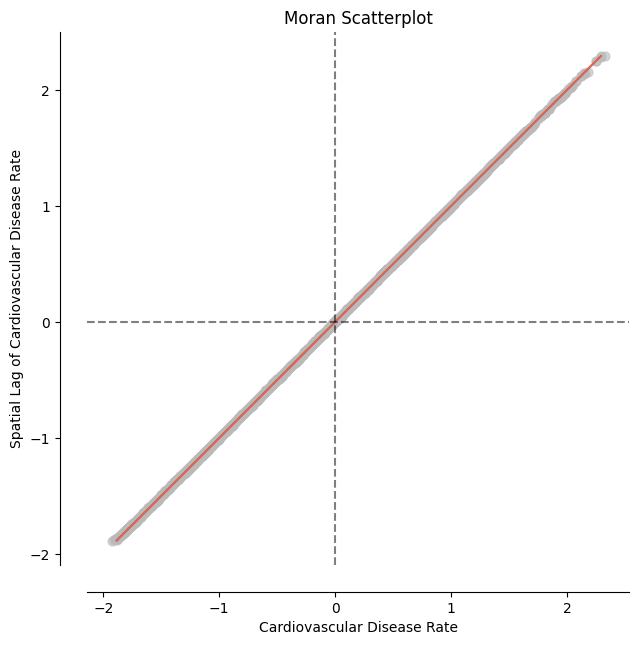

In [328]:
import matplotlib.pyplot as plt
import pysal.viz.mapclassify as mc
import pysal.lib as ps
import splot.esda as es

# Create a Moran scatterplot
fig, ax = es.moran_scatterplot(moran, aspect_equal=True)

# Add labels and styling
ax.set_xlabel("Cardiovascular Disease Rate")
ax.set_ylabel("Spatial Lag of Cardiovascular Disease Rate")
ax.set_title("Moran Scatterplot")

plt.show()